# ベイズ線形回帰（備忘録）

PRML3.3章を参考にして、ベイズ線形回帰をPythonで実装。PRML3.3章に従い、単純な線形モデルとして以下のモデル：
$$y=w_0+w_0 x$$
を考え、$w_0$、$w_1$の推定を行う。まずライブラリをインポートする。

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

### 1. 単純な線形モデル

### 1.1.データの用意
データセットを用意する。データ点としてまず$x_n$を一様分布からランダムに選び、$y=ax_n+b$周りに平均が0で標準偏差が0.25のガウス分布に従うノイズを発生させた値を$y_n$とする。
$$y_n = a x_n + b + \epsilon_n$$
ただし$\epsilon_n$は平均0、標準偏差0.25のガウス分布に従うノイズとする。$a$および$b$を推定する。

In [295]:
a = 0.25
b = -0.5
data_x = np.array([10.0*np.random.uniform() for i in range(0,30)])
noise = np.array([0.25*np.random.randn() for i in range(0,30)])
data_y = a * data_x + b + noise

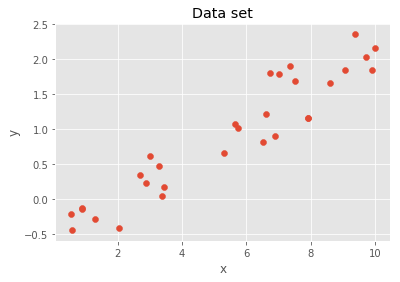

In [296]:
plt.scatter(data_x,data_y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Data set")
plt.show()

上図のような30点のデータが得られているとして、このデータをもとに線形回帰を行う。パラメータである$a$と$b$を以下で推定する。

### 1.2.事前分布の用意

このモデルで推定する2つのパラメーターの事前分布を用意する。事前分布はガウス分布[PRML(3.52)式]を仮定して、ハイパーパラメーターである事前分布の標準偏差は0.5とする。

In [297]:
sigma = 1.0 / 2.0 #ハイパーパラメータ（事前分布の標準偏差）
def pre_dist(w_0,w_1):#事前分布としてガウス分布を仮定
    return 1.0 / ( 2.0 * np.pi * sigma )  * np.exp( - 0.5 * ( w_0*w_0 + w_1*w_1 ) )

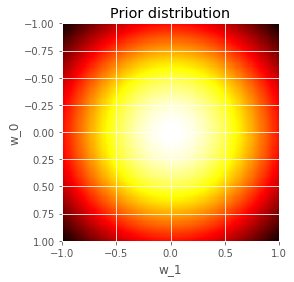

In [298]:
w_0 = np.array([0.01 * i for i in range(-100,100)]) #グラフ描画用
w_1 = np.array([0.01 * i for i in range(-100,100)]) #グラフ描画用
dist = np.array([([0.0 for i in range(-100,100)]) for j in range(-100,100)]) #グラフ描画用

for i in range(0,200):
    for j in range(0,200):
        dist[i][j] =  pre_dist(w_0[i],w_1[j]) #グラフ描画用

plt.imshow(dist,cmap='hot',extent=[-1, 1, 1, -1])
plt.xlabel('w_1')
plt.ylabel('w_0')
plt.title("Prior distribution")
plt.show()

## 1.3.尤度関数
得られているデータセットから尤度関数を計算する。データは独立なガウス分布から生成されているので、PRML(3.10)式で計算することができる。ハイパーパラメータとしてデータを生成する分布の標準偏差は0.25であるとする。

In [299]:
sigma_2 = 1.0 / 5.0 #ハイパーパラメータ
two_sigma = 2.0 * sigma_2 * sigma_2

def likelhood(w_0, w_1, data_x, data_y): #尤度関数
    number_of_data = len(data_x) #得られたデータの個数
    ref = 1.0
    for i in range(0,number_of_data):
        loss = data_y[i] - ( w_0 + data_x[i] * w_1 )
        ref *= 1.0 / np.sqrt( two_sigma * np.pi ) * np.exp( - 0.5 / two_sigma * loss * loss )    
    return ref

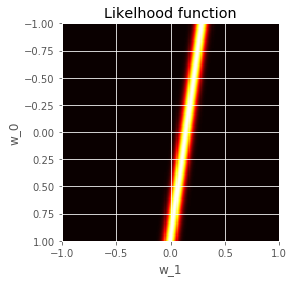

In [300]:
likel_hood = np.array([([0.0 for i in range(-100,100)]) for j in range(-100,100)]) #グラフ描画用

for i in range(0,200):
    for j in range(0,200):
        likel_hood[i][j] =  likelhood(w_0[i], w_1[j], data_x[0:1], data_y[0:1] ) #グラフ描画用

plt.imshow(likel_hood,cmap='hot',extent=[-1, 1, 1, -1])
plt.xlabel('w_1')
plt.ylabel('w_0')
plt.title("Likelhood function")
plt.show()

上図では、30個あるデータセット$\{(x_i,y_i),i=1,2,...,30\}$のうち1個のデータ$（x_1,y_1)$を用いて尤度関数を計算している。

### 1.4.事後分布
事後分布は尤度関数と事前分布の掛け算で計算できる。

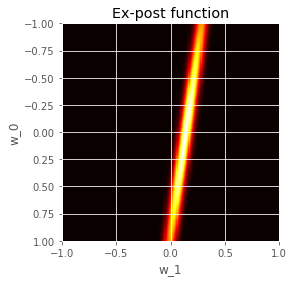

In [301]:
after_dist =  likel_hood * dist

plt.imshow(after_dist,cmap='hot',extent=[-1, 1, 1, -1])
plt.xlabel('w_1')
plt.ylabel('w_0')
plt.title("Ex-post function")
plt.show()

パラメータの分布が事前分布からより尖ったことがわかる。

### 1.5.事後分布の更新
1.4節で計算した事後分布を新しい事前分布に置き換える。そして新たに得たデータから尤度関数を計算し、尤度関数と事前分布を掛け合わせることで、事後分布を更新する。

In [302]:
dist = after_dist #事前分布の更新

In [303]:
likel_hood = np.array([([0.0 for i in range(-100,100)]) for j in range(-100,100)]) #グラフ描画用
for i in range(0,200):
    for j in range(0,200):
        likel_hood[i][j] =  likelhood(w_0[i],w_1[j],data_x[1:15],data_y[1:15]) #グラフ描画用

15個のデータを新たに付け加えて、尤度関数を計算する。

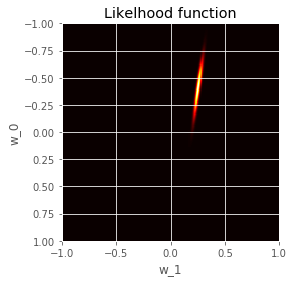

In [304]:
plt.imshow(likel_hood,cmap='hot',extent=[-1, 1, 1, -1])
plt.xlabel('w_1')
plt.ylabel('w_0')
plt.title("Likelhood function")
plt.show()

事後分布を更新する。

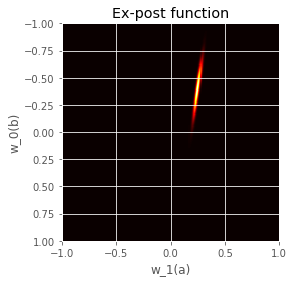

In [305]:
after_dist =  likel_hood * dist

plt.imshow(after_dist,cmap='hot',extent=[-1, 1, 1, -1])
plt.xlabel('w_1(a)')
plt.ylabel('w_0(b)')
plt.title("Ex-post function")
plt.show()

はじめにデータセットを生成する時に仮定して与えた$a=0.25、b=-0.5$に近い値に分布が集中していることがわかる。